In [2]:
#different versio of numpy required for top2vec
!pip uninstall numpy
!pip install numpy==1.19.5

Uninstalling numpy-1.20.3:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.20.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-5bebc122.3.13.dev.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.20.3
     |████████████████████████████████| 14.8MB 293kB/s 
ERROR: top2vec 1.0.24 has requirement numpy>=1.20.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 whi

In [1]:
#install the packages
# !pip install sentence-transformers
# !pip install nltk
# !pip install torch
# !pip install tensorflow
# !pip install tensorboard
!pip install top2vec
!pip install top2vec[sentence_encoders]
# !pip install top2vec[sentence_transformers]
# !pip install top2vec[indexing]

  Using cached https://files.pythonhosted.org/packages/a5/42/560d269f604d3e186a57c21a363e77e199358d054884e61b73e405dd217c/numpy-1.20.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [2]:
#import required packages
import random
from tqdm import tqdm
import numpy as np
import os
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [3]:
!git clone https://github.com/akashjorss/sentence_bert
!unzip sentence_bert/sentences.zip
import pickle
with open('sentences.bin', 'rb') as f:
  sentences = pickle.load(f)

Cloning into 'sentence_bert'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 31 (delta 10), reused 16 (delta 4), pack-reused 0
Unpacking objects: 100% (31/31), done.
Archive:  sentence_bert/sentences.zip
  inflating: sentences.bin           


In [4]:
# import tensorflow as tf
import tensorflow_datasets as tfds
from tensorboard.plugins import projector
#load tensorboards with magics
%tensorflow_version 2.x
%load_ext tensorboard

In [5]:
documents = random.choices(sentences,k = 100000)
documents = [d.lower() for d in documents]

In [6]:
from top2vec import Top2Vec
model = Top2Vec(documents, embedding_model='universal-sentence-encoder', workers=4)

2021-06-01 07:49:05,257 - top2vec - INFO - Pre-processing documents for training
2021-06-01 07:49:10,632 - top2vec - INFO - Downloading universal-sentence-encoder model
2021-06-01 07:49:26,106 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-06-01 07:49:41,764 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-06-01 07:52:23,099 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-06-01 07:52:33,366 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [7]:
model.hierarchical_topic_reduction(100)
# model.get_topic_hierarchy()
# topic_sizes, topic_nums = model.get_topic_sizes()
print("Original Number of topics: ", model.get_num_topics())
print("Reduced number of topics: ", model.get_num_topics(reduced=True))

Original Number of topics:  427
Reduced number of topics:  100


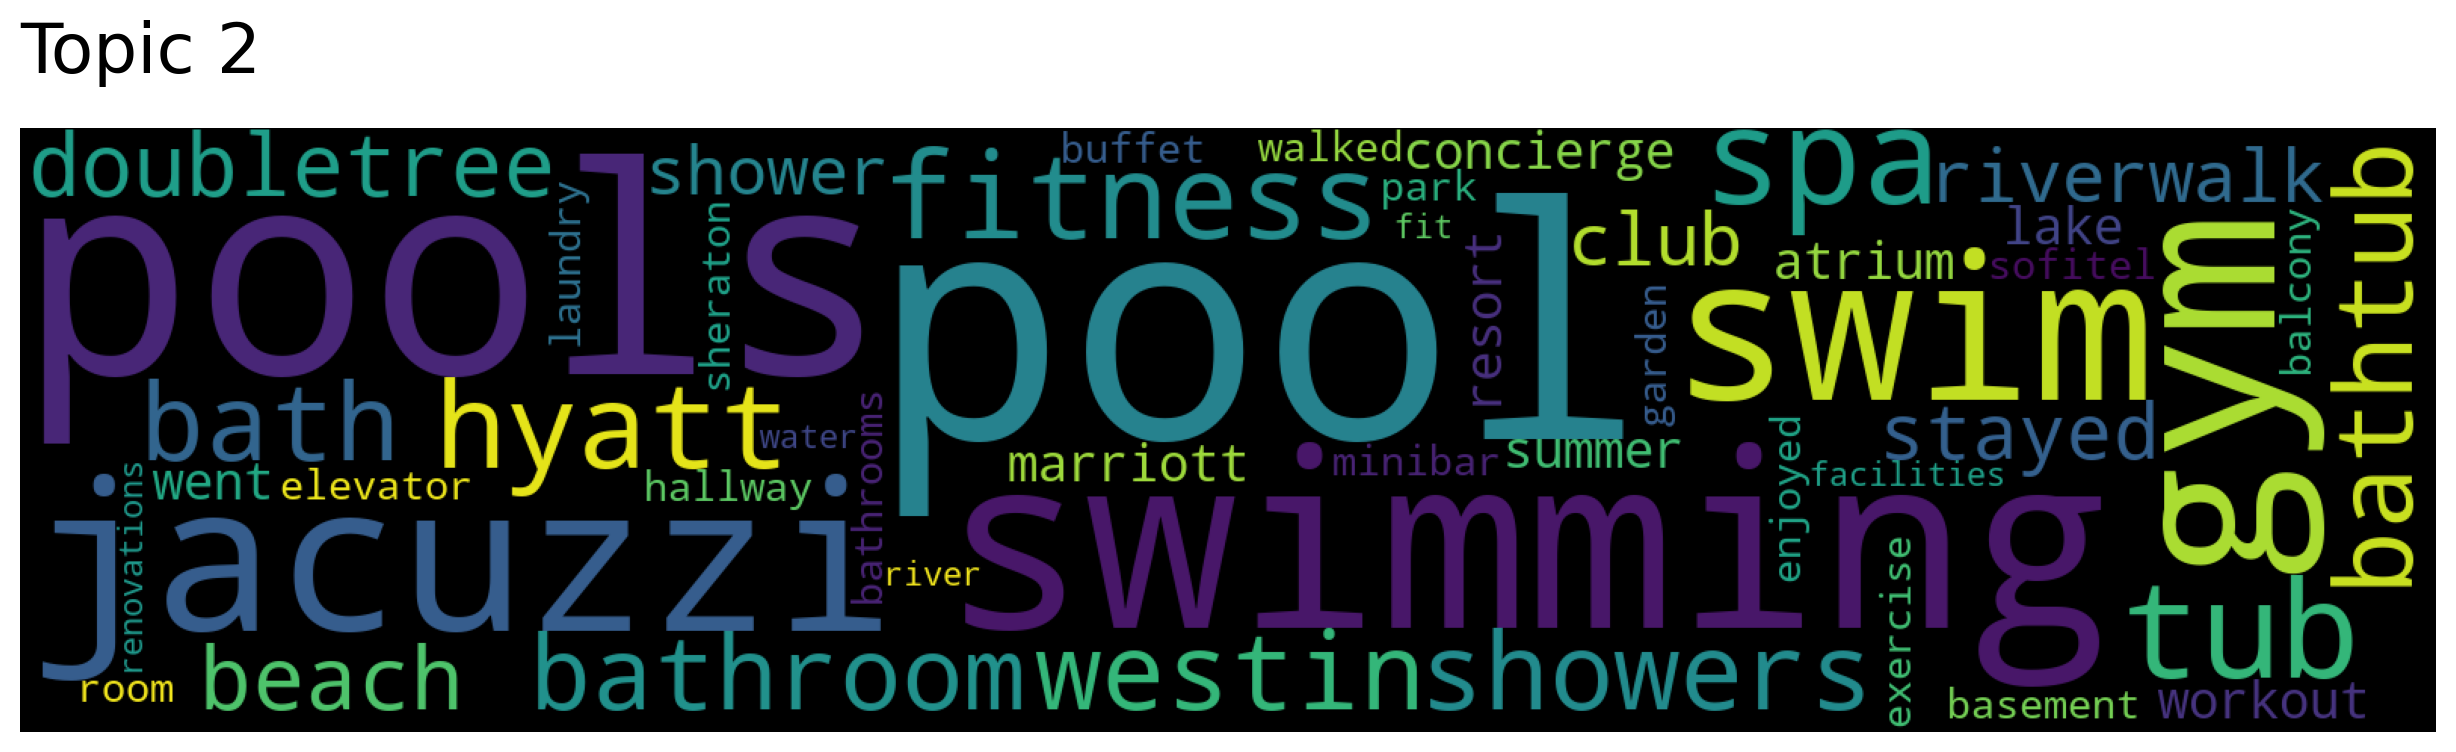

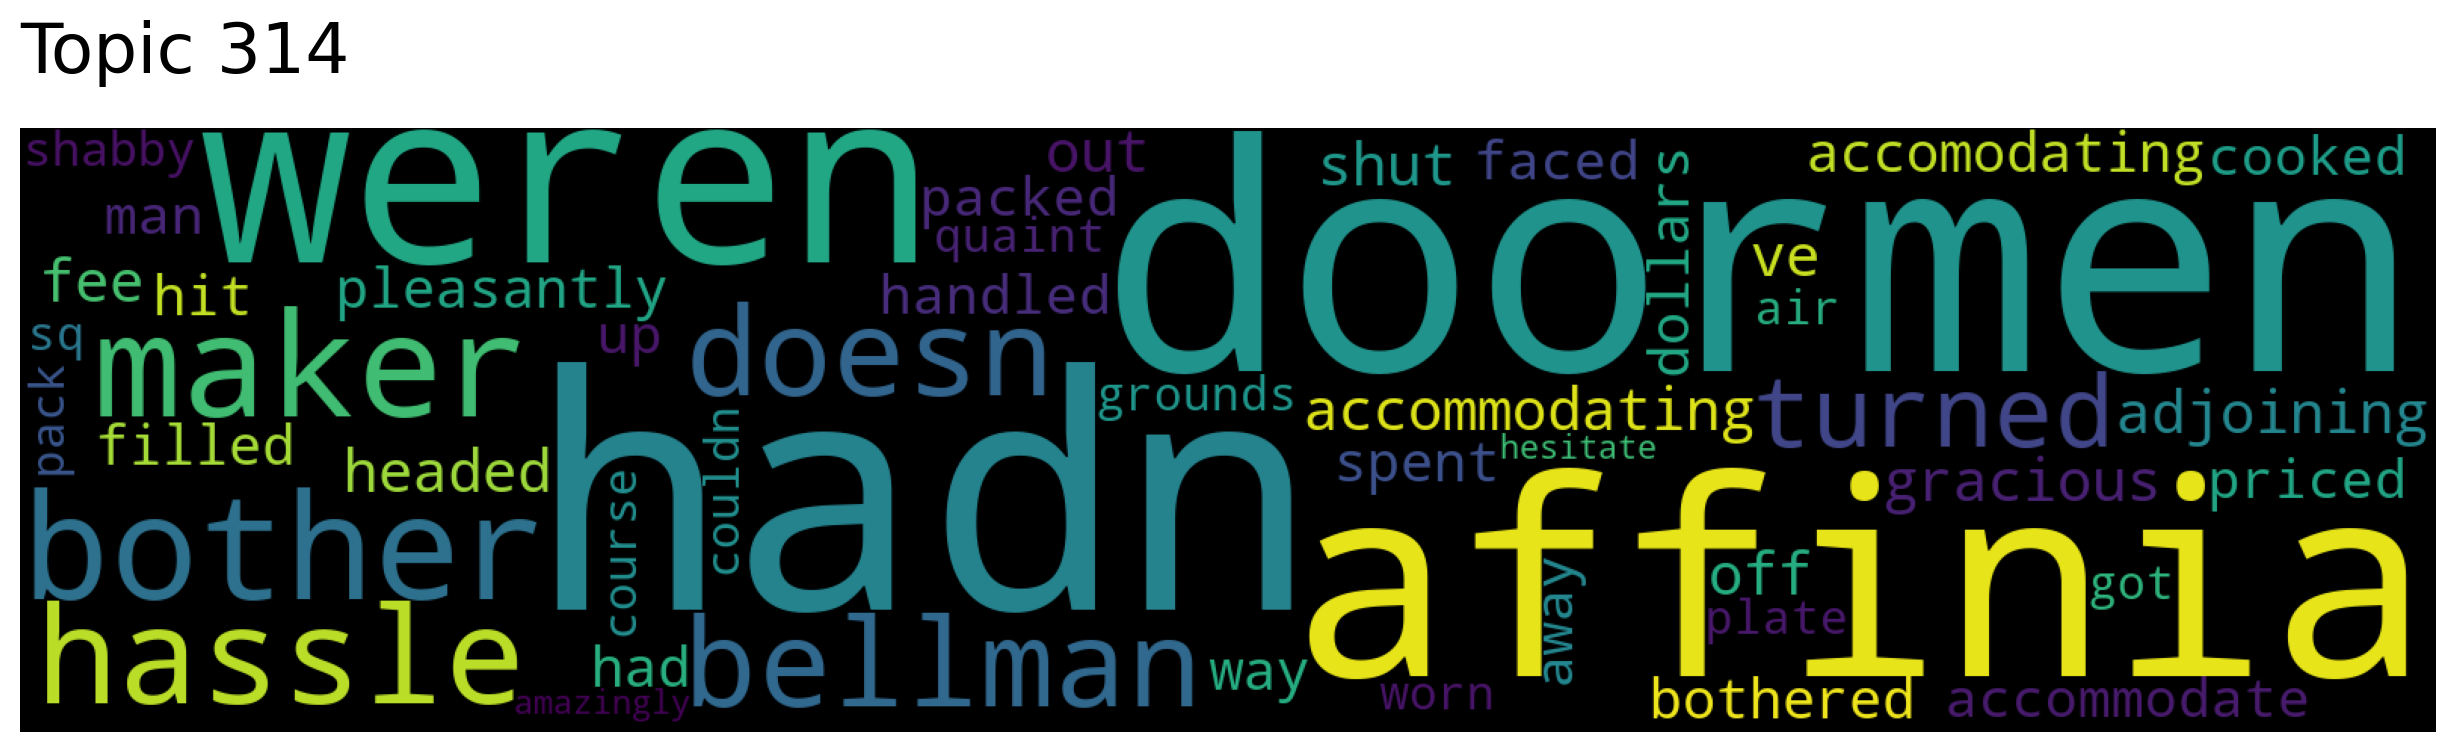

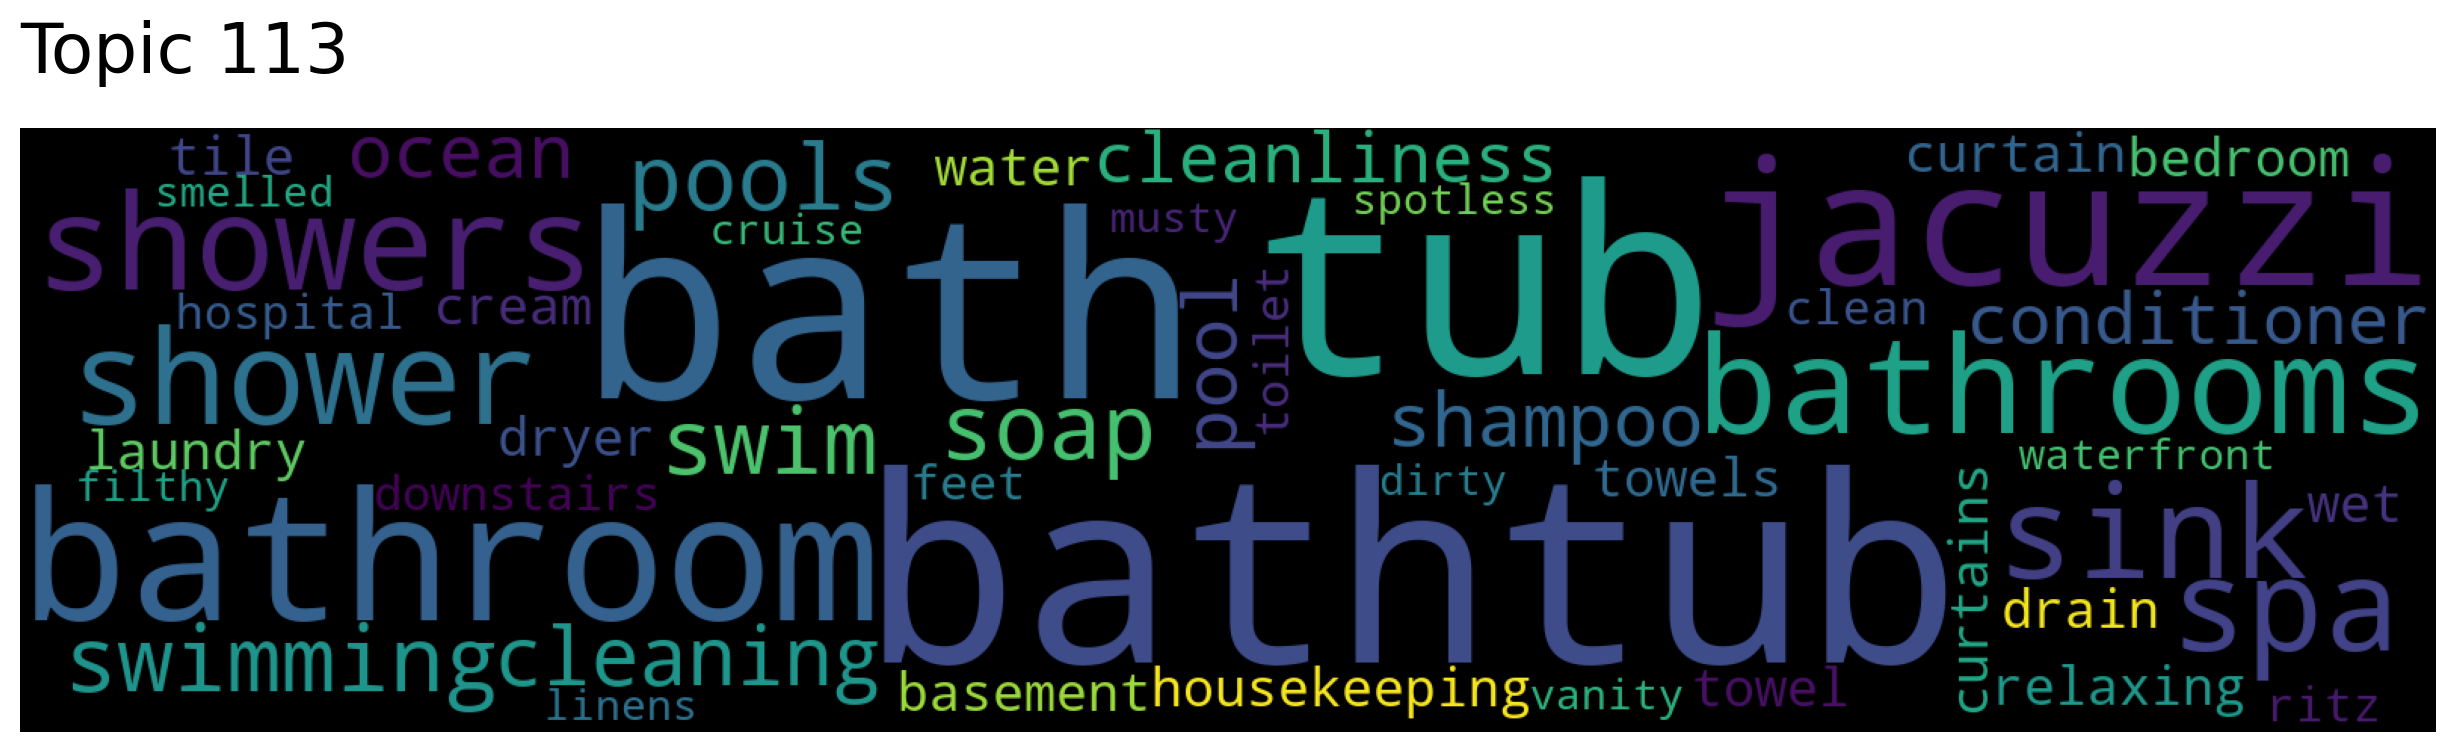

In [8]:
#word similarity
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["swimming"], num_topics=3, reduced=False) #swimming, cleanliness #keywords_neg=stop,
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
#reduce the number of topics and do hierarchical clustering
# topic_words, word_scores, topic_nums = model.get_topics(reduced=True)
# topic_nums = random.choices(topic_nums, k=20)
# for topic in topic_nums:
#     model.generate_topic_wordcloud(topic)

In [9]:
#get document vectors and plot using umap and tensorboard
#dim reduction using umap
import umap
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=3, 
                            metric='cosine').fit_transform(model.document_vectors)

In [ ]:
#visualize high dim data in embedding projector
# Set up a logs directory, so Tensorboard knows where to look for files
import numpy as np
import tensorflow as tf
log_dir='./logs/'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Save the weights we want to analyse as a variable. 
umap_weights = tf.Variable(random.choices(umap_embeddings, k=10000))
# Create a checkpoint from embedding, the filename and key are
# name of the tensor.
checkpoint = tf.train.Checkpoint(embedding=umap_weights)
checkpoint.save(os.path.join(log_dir, "umap_embedding.ckpt"))

# Set up config
config = projector.ProjectorConfig()
embedding = config.embeddings.add()
# The name of the tensor will be suffixed by `/.ATTRIBUTES/VARIABLE_VALUE`
embedding.tensor_name = "embedding/.ATTRIBUTES/VARIABLE_VALUE"
# embedding.metadata_path = 'metadata.tsv'
projector.visualize_embeddings(log_dir, config)

In [ ]:
!ls

In [ ]:
%tensorboard --logdir ./logs/

In [ ]:
#visualize word embeddings: get rid of stopwords, sentiment words, and take more sentences

In [ ]:
#function to process sentence to remove stopwords and sentiment words
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def process_sentence(s):
  s = s.lower()

  stop = stopwords.words('english')
  sentiment_tags = ['ADJ', 'ADV', 'RB', 'VBZ']


  words = word_tokenize(s)
  #remove stop words
  words = [w for w in words if w not in stop]
  #remove sentiment words
  pos_tags = nltk.pos_tag(words)
  words = [t[0] for t in pos_tags if t[1] not in sentiment_tags]
  s = " ".join(words)
  return s

In [ ]:
# random.choices(documents, k=10)
#sentence similarity
# s = "oh and it is an additional dollars per night to park your car there!"
# s = process_sentence(s)
# #process s to remove stopwords and sentiment words

# topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=s.split(), num_topics=3, reduced=False) #swimming, cleanliness #keywords_neg=stop,
# for topic in topic_nums:
#     model.generate_topic_wordcloud(topic)

In [ ]:
def calc_IG(words, docs):
  """calculate information gain for a topic in topic model containing words and documents
  args:
    words (set): list of top words in the topic. 
    docs (list): list of docs in the topic
  returns:
    ig (float): information gain of this topic with respect to total independence b/w words and docs"""
  
  #tokenize the docs using nltk punkt
  tokenized_docs = [word_tokenize(doc.lower()) in for doc in docs]
  #create inverted index between words and docs
  inverted_index = np.zeros((len(words),len(docs)))
  for i in range(len(words)):
    for j in range(len(docs)):
      inverted_index[i][j] = tokenized_docs[j].count(words[i])
  
  ig = 0.0
  for i in range(len(words)):
    for j in range(len(docs)):
      P_d_w = inverted_index[i][j]/(len(docs)*len(words))
      P_d = 1/len(docs)
      P_w = 1/len(words)
      P_d|w = inverted_index[i][j]/#total number of documents in which w occurs
      ig += P_d|w*np.log(P_d_w/(P_d*P_w))
  
  return ig     


